# **ML Assigment 5**
Submitted by Kshitij Mittal

----
### **1. Collaborative Filtering**

In [18]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_colwidth = 1000
from scipy.spatial.distance import pdist, squareform

In [2]:
df=pd.read_csv('/Users/kshitijmittal/Documents/UChicago Acad/03 Quarter 3/01 ML/99 Assignments/04 Recomm/radio_songs.csv', index_col='user')
print(df.shape)
df

(100, 284)


,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Checking density of the dataframe
density=((df.isin([1]).sum().sum())/(df.shape[0]*df.shape[1]))*100
print(f'This dataframe is only {density:0.2f}% filled')

This dataframe is only 4.35% filled


Use this user-item matrix to:

A. Recommend 10 songs to users who have listened to 'u2' and 'pink floyd'. Use item-item collaborative filtering to find songs that are similar using spatial distance with cosine. Since this measures the distance you need to subtract from 1 to get similarity as shown below.

In [17]:
item_matrix=df.T
item_matrix.head()

user,1,33,42,51,62,75,130,141,144,150,...,1521,1530,1536,1545,1549,1566,1586,1589,1601,1606
abba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ac/dc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adam green,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aerosmith,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
afi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Making song pairwise similarity matrix
song_sim_matrix=1-((squareform(pdist(item_matrix, metric='cosine'))))
song_sim_matrix_df=pd.DataFrame(song_sim_matrix, columns=item_matrix.index, index=item_matrix.index)

pf_u2=song_sim_matrix_df[['u2','pink floyd']]
pf_u2_sim=pf_u2[(pf_u2['u2']>0) | (pf_u2['pink floyd']>0)]
pf_u2_sim['comb_sim_score']=pf_u2['u2'] + pf_u2['pink floyd']

In [46]:
top_10_songs=pf_u2_sim.drop(['u2','pink floyd']).sort_values(by='comb_sim_score', ascending=False).head(10)
top_10_songs

,u2,pink floyd,comb_sim_score
robbie williams,0.500000,0.288675,0.788675
genesis,0.000000,0.577350,0.577350
johnny cash,0.353553,0.204124,0.557678
misfits,0.500000,0.000000,0.500000
audioslave,0.223607,0.258199,0.481806
foo fighters,0.301511,0.174078,0.475589
pearl jam,0.204124,0.235702,0.439826
green day,0.433013,0.000000,0.433013
depeche mode,0.408248,0.000000,0.408248
hans zimmer,0.000000,0.408248,0.408248


In [47]:
print("Top 10 songs/users similar to U2 and Pink Floyd are:")
print(top_10_songs.index.to_list())

Top 10 songs/users similar to U2 and Pink Floyd are:
['robbie williams', 'genesis', 'johnny cash', 'misfits', 'audioslave', 'foo fighters', 'pearl jam', 'green day', 'depeche mode', 'hans zimmer']


---------
B. Find user most similar to user 1606. Use user-user collaborative filtering with cosine similarity. List the recommended songs for user 1606 (Hint: find the songs listened to by the most similar user).



In [13]:

user_sim_matrix=1-((squareform(pdist(df.values, metric='cosine'))))
user_sim_matrix_df=pd.DataFrame(user_sim_matrix, columns=df.index, index=df.index)
user_sim_matrix_df

most_sim_user=user_sim_matrix_df[1606].drop(1606).idxmax()
most_sim_user_score=user_sim_matrix_df[1606].drop(1606).max()

print(f'The most similar user to 1606 is user #{most_sim_user} with a similarity score of {most_sim_user_score:.02f}')

The most similar user to 1606 is user #1144 with a similarity score of 0.28


In [14]:
df.loc[[1606,1144]]

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1606,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1144,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
# Songs listened by user 1144
sim_user_songs=df.loc[1144, df.loc[1144]==1].index

# Songs unheard by user 1606
main_user_unheard_songs=df.loc[1606, df.loc[1606]==0].index

# Intersection of two lists
reccomm_songs=sim_user_songs.intersection(main_user_unheard_songs)

print(f"The most recommended songs for user 1606 (as per 1144 usage) are:")
print(reccomm_songs.tolist())

The most recommended songs for user 1606 (as per 1144 usage) are:
['beastie boys', 'bob dylan', 'bob marley & the wailers', 'david bowie', 'eric clapton', 'johnny cash', 'pearl jam', 'pink floyd', 'the doors', 'the rolling stones', 'tom waits']


----
C. How many of the recommended songs has already been listened to by user 1606?

In [57]:
sim_user_songs=df.loc[1144, df.loc[1144]==1].index
main_user_songs=df.loc[1606, df.loc[1606]==1].index

print("Potential recommendations:","\n",sim_user_songs)
print("Songs user 1606 has already heard:","\n",main_user_songs)

Potential recommendations: 
 Index(['beastie boys', 'bob dylan', 'bob marley & the wailers', 'david bowie',
       'elvis presley', 'eric clapton', 'johnny cash', 'pearl jam',
       'pink floyd', 'the beatles', 'the doors', 'the rolling stones',
       'tom waits'],
      dtype='object')
Songs user 1606 has already heard: 
 Index(['abba', 'elvis presley', 'frank sinatra', 'the beatles'], dtype='object')


In [60]:
main_user_recom_heard=main_user_songs.intersection(sim_user_songs)
main_user_recom_heard

print(f"User 1606 has heard {len(main_user_recom_heard)} songs out of total {len(sim_user_songs)} potential recommendations")

User 1606 has heard 2 songs out of total 13 potential recommendations


----
D. Use a combination of user-item approach to build a recommendation score for each song for each user

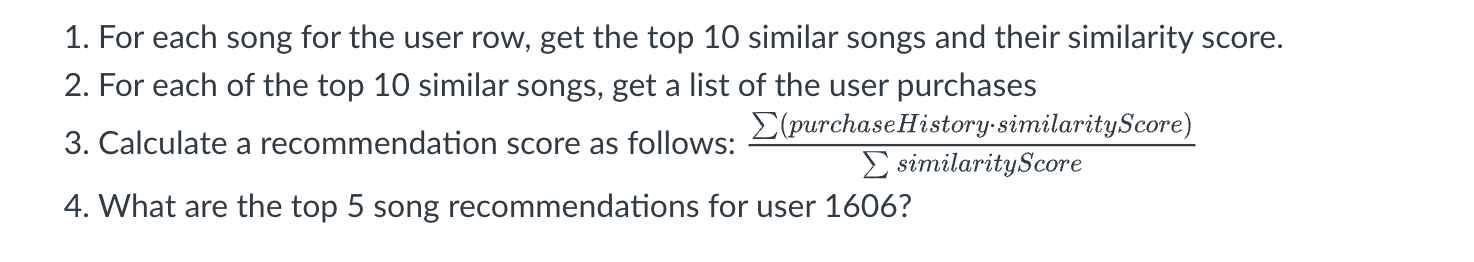

In [62]:
song_sim_matrix_df.head()

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
abba,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0
ac/dc,0.0,1.000000,0.0,0.0,0.223607,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.223607,0.0,0.2,0.0
adam green,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0
aerosmith,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0
afi,0.0,0.223607,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.000000,0.0,0.0,0.0


In [63]:
# Initialize an empty DataFrame to store the recommendation scores
recom_scores_df = pd.DataFrame(columns=df.columns, index=df.index)
recom_scores_df

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Iterate over users
for user in df.index:
    # Iterate over each song for a user
    for song in df.columns:
        # Finding top 10 similar songs for that user songs
        top_10_songs = song_sim_matrix_df[song].drop(song).nlargest(10)
        # Get purchase history for the top 10 songs
        purch_hist = []
        for similar_song, similarity_score in top_10_songs.iteritems():
            # Checking if user has previously bought that similar song
            if df.loc[user, similar_song] == 1:
                purch_hist.append(similarity_score)
        # Finding recommendation score for that particular song
        if len(purch_hist) > 0:
            recommendation_score = sum(purch_hist) / sum(top_10_songs)
        else:
            recommendation_score = 0
        # Update the recommendation scores DataFrame
        recom_scores_df.loc[user, song] = recommendation_score

In [65]:
recom_scores_df

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
user,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0.147209,0,0,0,0,0,0,0.088231,0.094411,0
33,0,0,1.0,0,0.20807,0,0,0.094377,0,0,...,0,0,0,0,NaN,0,0,0,0,0
42,0.173849,0.206181,0.061705,0.072073,0,0,0,0,0,0.077179,...,0,0,0,0,0,0.089999,0,0,0,0
51,0,0,0.188449,0,0.081329,0.095548,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0.07301,0,0.178129,0,0,0,0,0,...,0.217462,0,0,0,0,0,0,0.101881,0.094411,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,0,0,0,0,0,0,0,0,0.0865,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0.109101,0,0.095344,0.096801,0.095548,0,0.077059,0.441902,0,...,0.262859,0,0.049279,0,NaN,0,0,0,0,0.049279
1589,0.074842,0.191573,0,0,0,0,0,0,0,0,...,0,0,0.179883,0,0,0,0,0,0,0.179883


In [78]:
top5_recoms_1606=pd.DataFrame(recom_scores_df.loc[1606]).sort_values(by=1606, ascending=False).head(5).index.to_list()

print('Top 5 recommendations for user 1606 as per purchase history are:')
print(top5_recoms_1606)

Top 5 recommendations for user 1606 as per purchase history are:
['elvis presley', 'abba', 'eric clapton', 'frank sinatra', 'howard shore']


----
### **2. Conceptual Questions**

**Name 2 other similarity measures that you can use instead of cosine similarity above.**

* 1: Jaccard Distance - Measures the overlap between two sets of items, based on their attributes
* 2: Manhattan Distance - Measures the distance by summing the absolute differences between their vectors/coordinates

**What is needed to build a Content-Based Recommender system?**

For content based recommender system to work, we need analytical descriptions of the content. 
Rather than matching to other similar users, it matches a user to the features/attributes of the content item 

**Name 2 methods to evaluate your recommender system.**
* Precission @ k - the number of correct recommendations out of k recommendations
* Recall @ k - the number of actually correct recommendations that come in k recommendations

----
### **3. Neural Network using numpy**



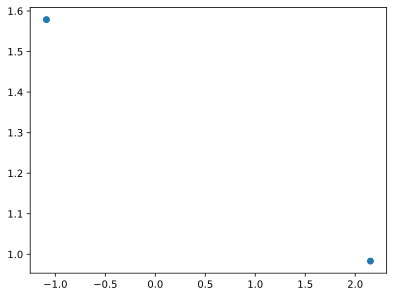

In [172]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

samples = 2
def load_extra_datasets(N):  
    gaussian_quantiles = make_gaussian_quantiles(mean=None, 
                                                 cov=0.7, 
                                                 n_samples=N, 
                                                 n_features=2, 
                                                 n_classes=2,  
                                                 shuffle=True, 
                                                 random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

#print(Y)
# Visualize the data
plt.scatter(X[0, :], X[1, :]) #c=Y, s=40)
plt.show()

In [173]:
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer

print(n_x, n_y)

2 1


In [174]:
# Random Initializer

W1 = np.random.randn(n_h,n_x) * 0.01
b1 = np.zeros(shape=(n_h, 1))
W2 = np.random.randn(n_y,n_h) * 0.01
b2 = np.zeros(shape=(n_y, 1))

print("W1\n", W1)
print("b1\n", b1)
print("W2\n", W2)
print("b2\n", b2)

W1
 [[-0.00995061  0.00694808]
 [-0.01710356 -0.00764379]
 [ 0.00096186  0.01680172]
 [ 0.00131638 -0.00474239]]
b1
 [[0.]
 [0.]
 [0.]
 [0.]]
W2
 [[-0.00560182 -0.02691384  0.0117815   0.00384671]]
b2
 [[0.]]


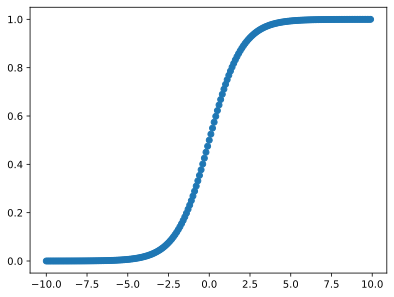

In [175]:
# Defining the activation function
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

total_cost = -9999

x=np.arange(-10,10,0.1)
plt.scatter(x=x, y=sigmoid(x))

In [176]:
rates=[0.0001, 0.01, 1]
del_b2_all={}

for learning_rate in rates:
    print(f'Learning Rate: {learning_rate}')
    del_b2_lr=[]        
    total_cost = -9999
    for i in range(10):
        print(f'Iteration number: {i+1}')
        # Implement Forward Propagation to calculate A2 (probabilities)
        Z1 = np.dot(W1,X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2,A1) + b2
        A2 = sigmoid(Z2) # Final output prediction

        # Compute the cross-entropy cost
        old_total_cost = total_cost
        cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) #J(theta)
        total_cost = -np.sum(cost_function) / samples

        dJdZ2 = A2 - Y
        dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
        dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
        # since activation function is tanh(Z1) = A1
        # first derivative of d/dz tanh(z) = 1 - tanh(z) ^ 2 = 1 - A1 ^ 2
        dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
        dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
        dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

        b2_old = b2
        W1 = W1 - learning_rate * dJdW1
        b1 = b1 - learning_rate * dJdb1
        W2 = W2 - learning_rate * dJdW2
        b2 = b2 - learning_rate * dJdb2
        
        delta_b2=(np.subtract(b2, b2_old))[0][0]
        print("delta change: ", (np.subtract(b2, b2_old))[0][0])
        print("change in total cost: ", total_cost-old_total_cost)
        del_b2_lr.append(delta_b2)
    print('--------')
    print("\n")
    del_b2_all[learning_rate]=del_b2_lr

Learning Rate: 0.0001
Iteration number: 1
delta change:  -1.816072082105047e-08
change in total cost:  9999.692767521865
Iteration number: 2
delta change:  -1.816120419981804e-08
change in total cost:  -8.661609585125518e-08
Iteration number: 3
delta change:  -1.8161687755613446e-08
change in total cost:  -8.662633588230051e-08
Iteration number: 4
delta change:  -1.8162171488442236e-08
change in total cost:  -8.66365785778811e-08
Iteration number: 5
delta change:  -1.81626553983294e-08
change in total cost:  -8.664682338288543e-08
Iteration number: 6
delta change:  -1.816313948529435e-08
change in total cost:  -8.665707029731351e-08
Iteration number: 7
delta change:  -1.8163623749348223e-08
change in total cost:  -8.666731998729915e-08
Iteration number: 8
delta change:  -1.8164108190502075e-08
change in total cost:  -8.667757156466394e-08
Iteration number: 9
delta change:  -1.81645928087837e-08
change in total cost:  -8.668782602860858e-08
Iteration number: 10
delta change:  -1.8165077

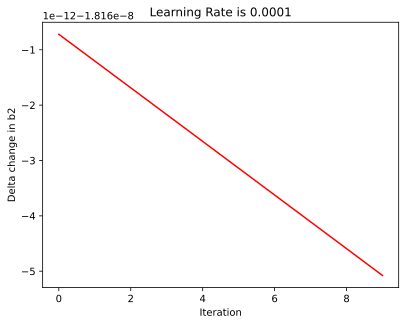

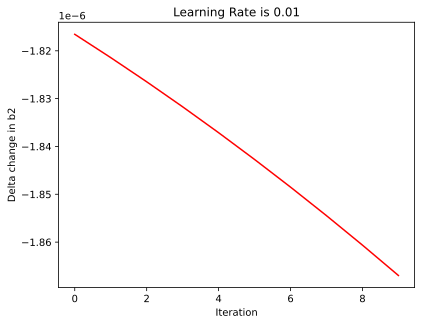

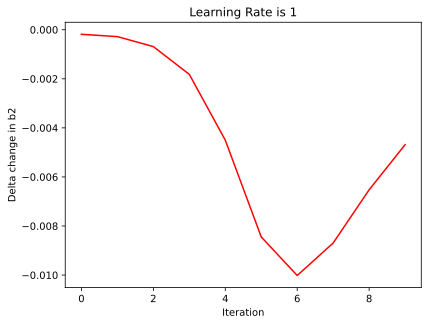

In [178]:
for i in list(del_b2_all.keys()):
    iter = list(range(10))
    plt.plot(iter, del_b2_all[i], color='red')
    plt.xlabel('Iteration')
    plt.ylabel('Delta change in b2')
    plt.title('Learning Rate is '+ str(i))
    plt.show()


**What can you conclude about the effect of the learning rate on the delta change in weight b2?**


Learning rate is an important hyperparameter to tune during gradient descent. 
It controls the step size of every iteration as it moves towards the minimal cost function. 
In our analysis, we examine three different learning rates:
* For Learning rate of 0.0001, we see change in b2 parameter in the order of e-8. These deltas are very small, and imply that the convergence will be slow
* For Learning rate of 0.01, the change in b2 parameter remains in the order of e-6. It performs as well as 0.0001, and will also provide a faster convergence
* For Learning rate of 1, the delta change in b2 moves very fast. We also see that it decreases, and then starts increasing as well. This implies that the step size is too big, and we can miss the minimum cost function

---
End of assignment